In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import time

In [2]:
logs = pd.read_csv(os.path.join("ArcSight-Fortigate-20131026 0230~0300.csv"),low_memory=False,encoding="big5")

In [3]:
pd.set_option('display.max_columns', 500)
logs.head()

,Event Time,Receipt Time,Device,Logger,Version,Device Vendor,Device Product,Device Version,deviceEventClassId,Name,Severity,Non-CEF Raw Message,deviceEventClassId.1,ad.dummy,name,sourceZoneURI,destinationAddress,sourcePort,destinationServiceName,catdt,deviceCustomString1Label,eventId,deviceExternalId,deviceVersion,rawEvent,deviceInboundInterface,deviceTimeZone,agentReceiptTime,message,destinationPort,deviceCustomNumber1,deviceCustomString5Label,startTime,deviceReceiptTime,agentZoneURI,deviceCustomString2Label,deviceEventCategory,deviceCustomString4,deviceCustomString5,deviceProduct,ad.src__country,_cefVer,c6a4,agentId,Raw Message,externalId,ad.vd,deviceCustomNumber3Label,deviceCustomString6Label,sourceAddress,deviceCustomString3Label,deviceCustomNumber1Label,endTime,deviceCustomNumber2Label,Event Time.1,c6a4Label,deviceVendor,baseEventCount,deviceHostName,agentType,bytesIn,transportProtocol,agentVersion,agentTimeZone,deviceSeverity,Device.1,Logger.1,destinationZoneURI,deviceCustomString4Label,agentAddress,deviceOutboundInterface,deviceAction,agentHostName,ad.dst__country,bytesOut,sourceHostName,destinationHostName,categoryBehavior,deviceFacility,categoryDeviceGroup,deviceCustomNumber3,deviceCustomNumber2,ad.dir__disp,categoryObject,categorySignificance,categoryOutcome,c6a3Label,c6a2Label,ad.dns__ip,ad.dns__name,ad.group,ad.tran__sip,deviceDirection,ad.tran__sport,destinationTranslatedPort,destinationTranslatedAddress,destinationTranslatedZoneURI,ad.cfg__path,ad.cfg__tid,sourceUserName,ad.cfg__obj,sourceProcessName,ad.ui,outcome,reason,ad.cpu,ad.mem,ad.total__session,ad.tran__port,ad.tran__ip.4,ad.log,ad.ftp,ad.fdni,ad.idsdb,ad.pop3,ad.externalInfo,ad.aven,ad.virdb,ad.idssn,ad.libav,ad.imap,ad.idsmn,ad.http,ad.fcni,ad.smtp
0,2013/10/26 02:30:01 CST,2013/10/26 02:30:05 CST,10.20.3.191 [Taipei_C_Syslog],本機,0,Fortinet,Fortigate,NaN,7,traffic: deny,Medium,NaN,7,date=2013-10-25 time=10:09:42 devname=20NFWISA...,traffic: deny,/All Zones/ArcSight System/Private Address Spa...,255.255.255.255,62976.0,udp,Network-based IDS/IPS,Rule,310024,FG300C3912601913,NaN,<188>date=2013-10-25 time=10:09:42 devname=20N...,port2,Asia/Taipei,2013/10/26 02:29:52 CST,"iprope_in_check() check failed, drop",62976.0,12211220.0,Policy ID,2013/10/25 10:09:42 CST,2013/10/25 10:09:42 CST,/All Zones/ArcSight System/Private Address Spa...,Reference,traffic:other,deny,0.0,Fortigate,Reserved,0.1,fe80:0:0:0:a884:82f6:f06a:2ac8,3JB3hyz8BABCAAwSBmGVW-w==,NaN,179005312.0,root,Packets Received,Group,10.20.254.219,VPN,Duration,2013/10/25 10:09:42 CST,Packets Sent,NaN,Agent IPv6 Address,Fortinet,1,20NFWISA002,syslog,0.0,UDP,6.0.3.6664.0,Asia/Taipei,warning,NaN,NaN,/All Zones/ArcSight System/Private Address Spa...,Status,10.20.3.191,root,deny,20DPHCSSI01,Reserved,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013/10/26 02:30:01 CST,2013/10/26 02:30:05 CST,10.20.3.191 [Taipei_C_Syslog],本機,0,Fortinet,Fortigate,NaN,7,traffic: deny,Medium,NaN,7,date=2013-10-25 time=10:09:43 devname=20NFWISA...,traffic: deny,/All Zones/ArcSight System/Public Address Spac...,17.128.255.255,138.0,udp,Network-based IDS/IPS,Rule,310025,FG300C3912601913,NaN,<188>date=2013-10-25 time=10:09:43 devname=20N...,port4,Asia/Taipei,2013/10/26 02:29:52 CST,"iprope_in_check() check failed, drop",138.0,12211221.0,Policy ID,2013/10/25 10:09:43 CST,2013/10/25 10:09:43 CST,/All Zones/ArcSight System/Private Address Spa...,Reference,traffic:other,deny,0.0,Fortigate,United States,0.1,fe80:0:0:0:a884:82f6:f06a:2ac8,3JB3hyz8BABCAAwSBmGVW-w==,NaN,179005319.0,root,Packets Received,Group,17.128.243.188,VPN,Duration,2013/10/25 10:09:43 CST,Packets Sent,NaN,Agent IPv6 Address,Fortinet,1,20NFWISA002,syslog,0.0,UDP,6.0.3.6664.0,Asia/Taipei,warning,NaN,NaN,/All Zones/ArcSight System/Public Address Spac...,Status,10.20.3.191,root,deny,20DPHCSSI01,United States,0.0,NaN,

In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140398 entries, 0 to 140397
Columns: 125 entries, Event Time to ad.smtp
dtypes: float64(26), int64(5), object(94)
memory usage: 133.9+ MB


## two　features

In [5]:
logs.sourceAddress.value_counts()

10.0.10.31         51437
10.0.4.103         12774
10.1.24.62         11714
10.50.3.191         9410
10.0.4.101          5648
10.80.3.191         4036
10.0.10.11          2674
10.0.4.131          2472
192.168.1.9         2333
10.0.10.12          2012
10.0.10.71          1605
10.0.10.72          1605
10.0.12.251         1435
10.50.241.112       1110
10.40.3.191         1053
10.20.3.191          848
10.0.10.191          625
10.1.24.182          534
10.1.25.61           476
10.1.23.113          419
10.0.21.13           396
10.0.21.14           396
10.0.10.91           356
10.0.10.94           355
10.0.10.154          354
10.1.25.62           350
10.0.10.92           347
10.50.253.240        312
10.0.12.200          299
10.0.10.23           288
                   ...  
10.54.254.254          1
210.212.230.196        1
17.144.242.146         1
10.50.243.223          1
192.168.2.14           1
66.249.64.5            1
202.129.171.194        1
17.176.240.241         1
10.40.3.193            1


In [6]:
def transIP(ip):
    sum = 0
    ip = ip.split('.')
    ip = [int(x) for x in ip]
    for i in range(4):
        max = 1000/10**i
        min = max/10
        diff = max - min
        sum += min + ip[i]/256*diff
    return sum
def transDate(date):
    date = date[slice(0,len(date)-4)]
    return time.mktime(datetime.strptime(date,"%Y/%m/%d %H:%M:%S").timetuple())
def transDateDiff(stemp, base):
    return stemp-base
transIP('192.168.1.169')

845.791796875

### Process Data

#### 刪去 NaN

In [7]:
print(len(logs))

def drop_nan(key,logs):
    indexs = []
    for i in range(len(logs)):
        if(type(logs[key][i])==float): 
            indexs.append(i)
    return logs.drop(index=indexs)
train_logs = drop_nan("sourceAddress", logs)

140398


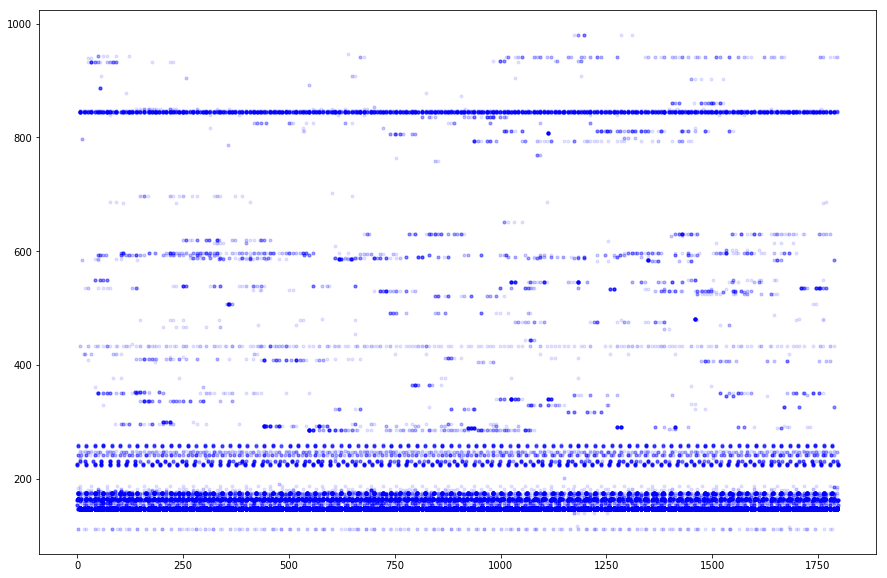

In [8]:
ip_part = train_logs["sourceAddress"]
time_part = train_logs["Event Time"]
sp = [
    transIP(ip) for ip in ip_part
]
dt = []
dt = [transDate(date) for date in time_part]
min_dt = min(dt)
dt = [transDateDiff(date,min_dt) for date in dt]
plt.figure(figsize=(15,10))
plt.plot(dt,sp,"b.",alpha=0.1)

### StandardScaler

In [9]:
print(dt[:5],sp[:5])
from sklearn.preprocessing import StandardScaler
training_set = np.c_[dt,sp]
print(training_set[100:110])
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set)
print(training_set[100:110])

[0.0, 0.0, 0.0, 0.0, 0.0] [162.987109375, 225.06953125, 162.9765625, 224.334765625, 154.064453125]
[[  1.         164.61132812]
 [  1.         164.61132812]
 [  1.         172.25078125]
 [  1.         172.70078125]
 [  1.         164.61132812]
 [  1.         146.75195312]
 [  1.         164.61132812]
 [  1.         241.1921875 ]
 [  1.         164.61132812]
 [  1.         241.19570312]]
[[-1.74177644 -0.16672581]
 [-1.74177644 -0.16672581]
 [-1.74177644 -0.11355213]
 [-1.74177644 -0.11041995]
 [-1.74177644 -0.16672581]
 [-1.74177644 -0.29103426]
 [-1.74177644 -0.16672581]
 [-1.74177644  0.36630786]
 [-1.74177644 -0.16672581]
 [-1.74177644  0.36633233]]


#### K-mean...

In [10]:
from sklearn.cluster import KMeans
N_CLASS = 7
kmeans = KMeans(n_clusters=N_CLASS, random_state=0).fit(training_set)
y_pred = kmeans.predict(training_set)

In [11]:
def draw_class(cla,color,alpha):
    plt.plot(cla[:,0],cla[:,1],".",color=color,alpha=alpha)

def draw_cluster_points(pred, data, n, colors,alpha=0.1):
    for i in range(n):
        cla = [(c==i) for c in y_pred]
        cla = data[cla]
        draw_class(cla,colors[i],alpha)

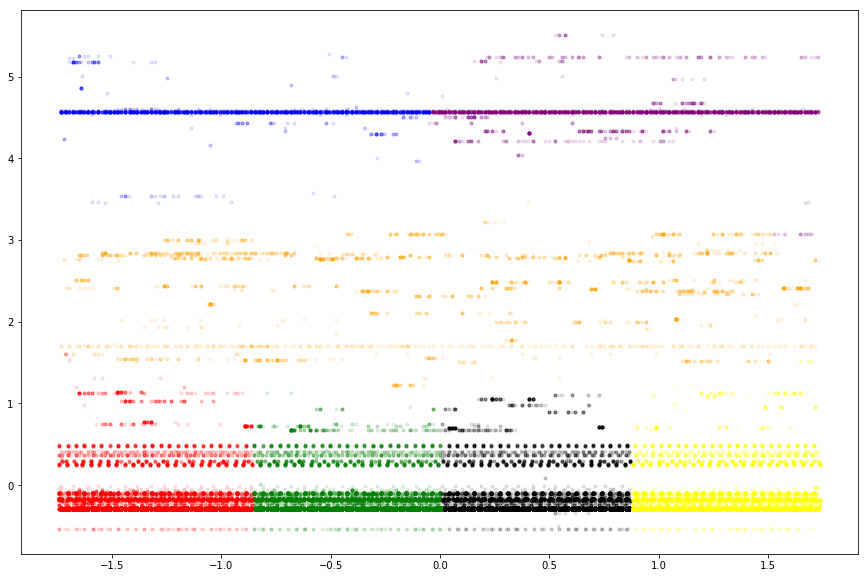

In [12]:
colors = ['blue','orange','green','red','black','purple','yellow','brown','gray']
plt.figure(figsize=(15,10))
draw_cluster_points(y_pred, training_set, N_CLASS, colors[:N_CLASS])
plt.show()

#### SpectralClustering ....

what is this?

In [13]:
from sklearn.cluster import SpectralClustering
scluster = SpectralClustering()
small_training_set = training_set[:10000]

In [14]:
y_pred = scluster.fit_predict(small_training_set)
print(y_pred)

[0 0 0 ... 0 0 0]


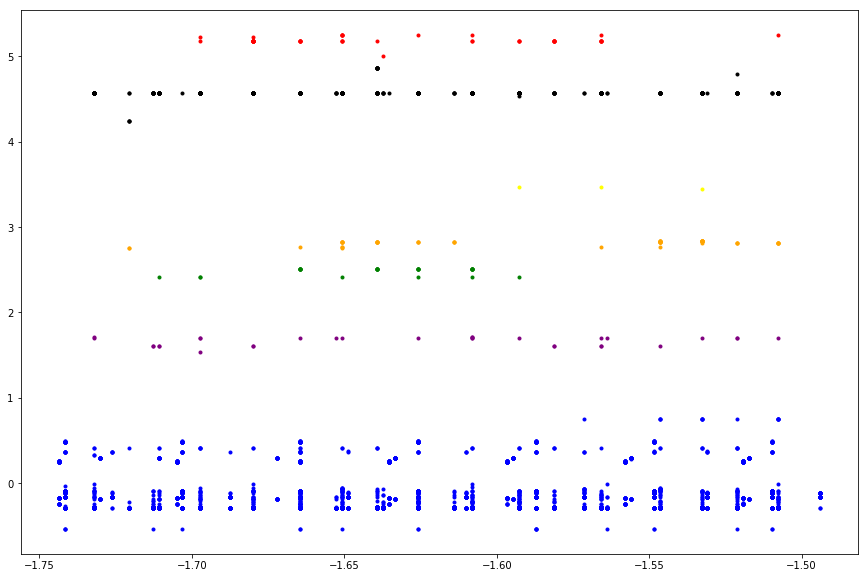

In [15]:
plt.figure(figsize=(15,10))
N_CLASS = max(y_pred)
draw_cluster_points(y_pred, small_training_set, N_CLASS, colors[:N_CLASS],alpha=1)
plt.show()

## three features

In [16]:
print(len(train_logs))
train_logs = drop_nan("destinationAddress", logs)
print(len(train_logs))

140370
140368


In [17]:
scaler = StandardScaler()
ip_part = train_logs["sourceAddress"]
time_part = train_logs["Event Time"]
des_part = train_logs["destinationAddress"]
sp = [
    transIP(ip) for ip in ip_part
]
dp = [
   transIP(ip) for ip in des_part 
]
dt = []
dt = [transDate(date) for date in time_part]
min_dt = min(dt)
dt = [transDateDiff(date,min_dt) for date in dt]

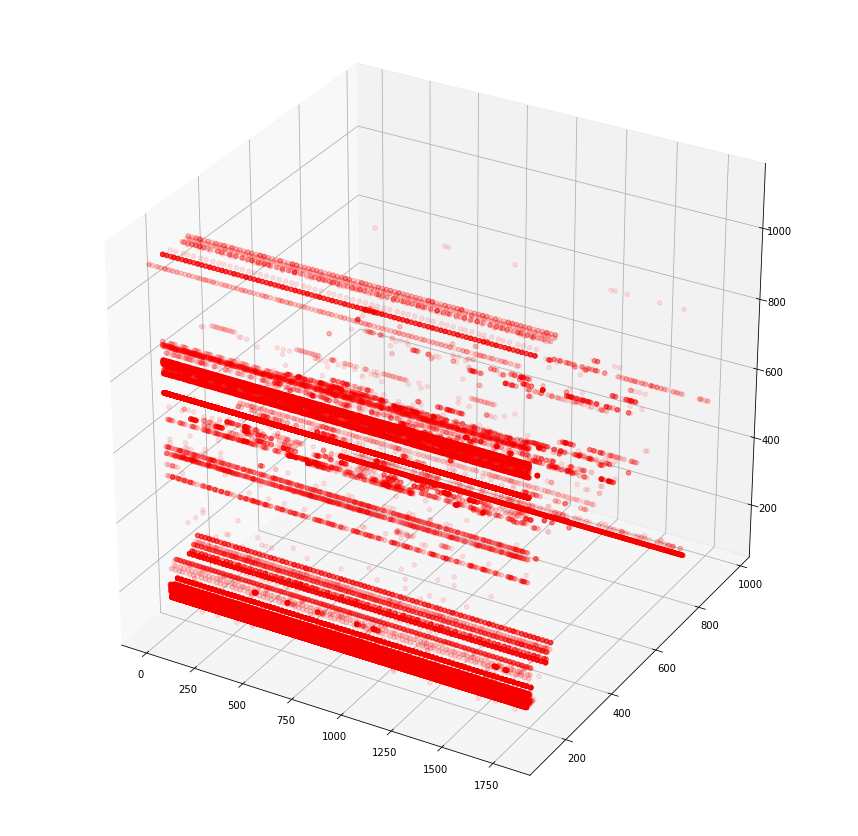

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt,sp,dp,c="r",marker="o",alpha=0.1)
plt.show()

In [19]:
training_set = np.c_[dt,sp,dp]
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set)

In [20]:
small_training_set = training_set[:25000]
y_pred = scluster.fit_predict(small_training_set)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

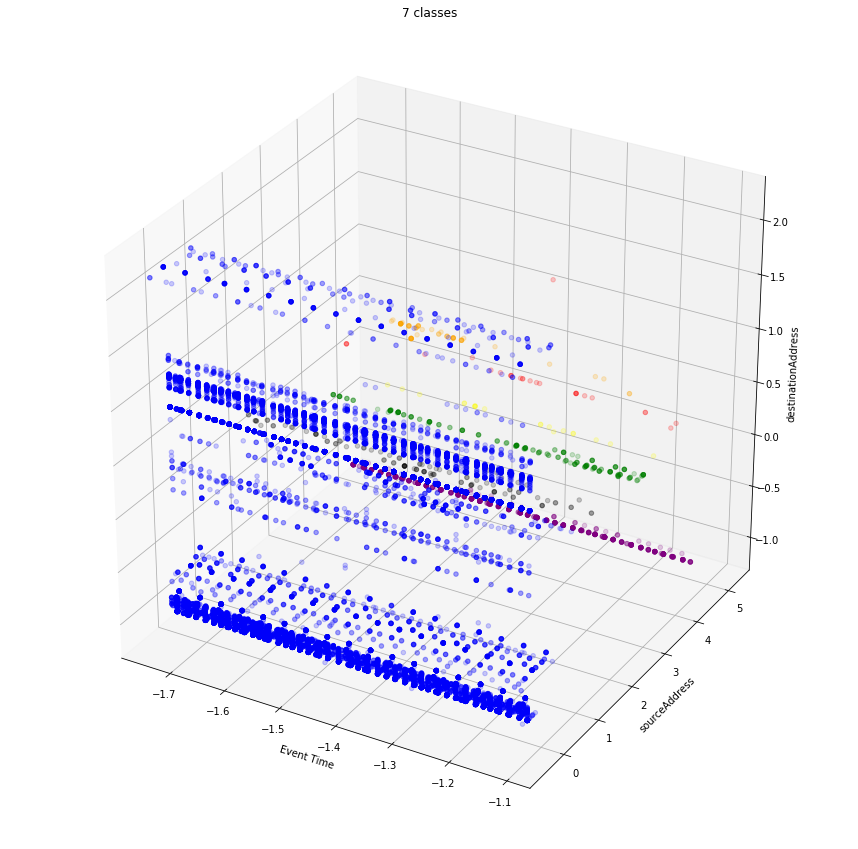

In [33]:
def draw_cla_3d(ax,x,y,z,c):
    ax.scatter(x,y,z,c=c,marker="o",alpha=0.2)


fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.title.set_text("{} classes".format(max(y_pred)))
for i in range(y_pred.max()):
    filter = [(x==i) for x in y_pred]
    cla = small_training_set[filter]
    draw_cla_3d(ax,cla[:,0],cla[:,1],cla[:,2],colors[i])
ax.set_xlabel('Event Time')
ax.set_ylabel('sourceAddress')
ax.set_zlabel('destinationAddress')
plt.show()